# Bike Sharing Program Demand Prediction Analysis

Narrative and Project Objective
- We were hired by Washington D.C.’s Department of Transportation to come and consult in a community project being tested in the area. The Department is trying to push for more carbon efficient solutions and has initiated a bike sharing program, so users can sign up and reserve some bikes to use in advance or use the bikes when they see fit without registering. The Department wants to see what type of growth there has been since the program's initial implementation, and wishes to see projections of the average monthly use of the program for next year to see if it is growing or lessening in popularity. 

We are going to Use Temp, Hum, WindSpd, and Month

Overall Notes:
    <br>
    <br> - oribikedf is the DataFrame for the original data set
    

# O'Carson's Notebook Notes

# 1. Atemp stands for the apparrent-felt temperature, so I changed it
    
# 2. Where were errors being caused for this code? 
    # "pd.DataFrame(oribikedf)
    # Just elsewhere. Trying to reference the data frame  in anyway while adding functions was giving me errors because the dataframe was somehow not declared.
# 3. I don't really think onlinearbikedf.describe() is neccessary, we can just highlight the important information from oribikedf
    # Unlesss you want to show that dataframe in the presentation
# 4. Is there a reason why the seasonal % would be better interpreted than the other categorical columns? They were dropped too
# 5. Reg_Users being good predictors of TotalUses a good ideas to say? Isn't it obvious, since they both add 
# up to TotalUses? Check correlation section
# 6. Should TotalUses be called Total Users
# 7. Why did you do .corr again after the Encoding? Let me know what you were trying to show, there are a lot of columns now
# 8. What is the spring.head code?
# 9. I need to ask the professor how and why we need to drop one of the month categories as a "baseline" category

In [1]:
# O'Carson's Presentation Notes
# 1. Do we need to show how we renamed the columns in the presentation?
# 2. Just to make sure, you don't want us to show the code?
# 3. Do we need to show .info, how we renamed the columns, and how we dropped the instant column?
# 4. We need to show how we denormalized temparature and windspeed? How? There will be a lot of dataframes

### Part 1: Data Inspection and Wrangling

In [2]:
# Importing pandas, numpy, the encoder, and the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
oribikedf = pd.read_csv(r"/Users/juliansoler-rivera/Downloads/day.csv")

In [3]:
# First view of the data
oribikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Shows #rows and #columns
oribikedf.shape

(731, 16)

In [5]:
# Renaming the columns
oribikedf = oribikedf.rename(columns={'dteday': 'Date', 'season': 'Season', 'yr': 'Year', 'mnth': 'Month', 'registered':'Reg_Users','cnt':'TotalUses', 'holiday': 'Holiday', 'weekday': 'Weekday', 'workingday':'Workday', 'weathersit': 'WtrStatus', 'temp':'Temp', 'atemp':'FeltTemp', 'hum': 'Humidity', 'windspeed': 'WindSpd', 'casual':'Cas_Users'})

# Dropping the uncessesary "instant" column
oribikedf = oribikedf.drop("instant", axis=1)
oribikedf

,Date,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
# Changing Temp and FeltTemp columns from C to F, and denormalizied them. 
# All Temp and FeltTemp data were originally divided by 41 and 50, respectively
oribikedf["Temp"] = (((oribikedf["Temp"]*41)*(9/5)) + 32)
oribikedf["FeltTemp"] = (((oribikedf["FeltTemp"]*50)*(9/5)) + 32)

# Changing Windspeed back Mph, and denormalzing it. It was orginally divided by 67
oribikedf["WindSpd"] = (oribikedf["WindSpd"]*67)
oribikedf


,Date,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
0,2011-01-01,1,0,1,0,6,0,2,57.399525,64.72625,0.805833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,58.824676,63.83651,0.696087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,46.491663,49.04645,0.437273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,46.760000,51.09098,0.590435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,48.749427,52.63430,0.436957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,50.757525,52.39778,0.652917,23.458911,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,50.695975,54.95414,0.590000,10.416557,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,50.695975,53.81600,0.752917,8.333661,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,50.880475,52.85300,0.483333,23.500518,364,1432,1796


In [7]:
# Shows a list of columns, hnon-null values, and data types. There are no null/missing values
oribikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       731 non-null    object 
 1   Season     731 non-null    int64  
 2   Year       731 non-null    int64  
 3   Month      731 non-null    int64  
 4   Holiday    731 non-null    int64  
 5   Weekday    731 non-null    int64  
 6   Workday    731 non-null    int64  
 7   WtrStatus  731 non-null    int64  
 8   Temp       731 non-null    float64
 9   FeltTemp   731 non-null    float64
 10  Humidity   731 non-null    float64
 11  WindSpd    731 non-null    float64
 12  Cas_Users  731 non-null    int64  
 13  Reg_Users  731 non-null    int64  
 14  TotalUses  731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


### Part 2: Key Summary Statistics

In [8]:
# Key Observations:

# There is a far higher number of registered users than casual users
# The mean Temp is 68.55F on a given day
# The mean FeltTemp is 74.69F on a given day
# The mean Humidity is 0.627 on a given day
# The mean WindSpd is 12MPH on a given day 
# The mean # of Casual Users is 848 on a given day 
# The mean # of Registered Users is 3656 on a given day
# The mean # of Total Uses is 4504 on a given day

pd.options.display.float_format = '{:.4f}'.format
oribikedf.describe()

,Season,Year,Month,Holiday,Weekday,Workday,WtrStatus,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,2.4966,0.5007,6.5198,0.0287,2.9973,0.6840,1.3953,68.5594,74.6919,0.6279,12.7626,848.1765,3656.1724,4504.3488
std,1.1108,0.5003,3.4519,0.1672,2.0048,0.4652,0.5449,13.5092,14.6665,0.1424,5.1924,686.6225,1560.2564,1937.2115
min,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,36.3638,39.1163,0.0000,1.5002,2.0000,20.0000,22.0000
25%,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,56.8768,62.4058,0.5200,9.0416,315.5000,2497.0000,3152.0000
50%,3.0000,1.0000,7.0000,0.0000,3.0000,1.0000,1.0000,68.7770,75.8060,0.6267,12.1253,713.0000,3662.0000,4548.0000
75%,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,80.3697,86.7742,0.7302,15.6254,1096.0000,4776.5000,5956.0000
max,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,95.5910,107.6806,0.9725,34.0000,3410.0000,6946.0000,8714.0000


In [9]:
numericalbikedf = oribikedf.drop(['Season','Year','Month', 'Holiday', 'Weekday', 'Workday', 'WtrStatus' ],axis=1)
numericalbikedf.describe()

,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,68.5594,74.6919,0.6279,12.7626,848.1765,3656.1724,4504.3488
std,13.5092,14.6665,0.1424,5.1924,686.6225,1560.2564,1937.2115
min,36.3638,39.1163,0.0000,1.5002,2.0000,20.0000,22.0000
25%,56.8768,62.4058,0.5200,9.0416,315.5000,2497.0000,3152.0000
50%,68.7770,75.8060,0.6267,12.1253,713.0000,3662.0000,4548.0000
75%,80.3697,86.7742,0.7302,15.6254,1096.0000,4776.5000,5956.0000
max,95.5910,107.6806,0.9725,34.0000,3410.0000,6946.0000,8714.0000


### Part 3: Correlations

In [10]:
#Creation of a Correlation Matrix
# Notice that the variables most highly correlated with TotalUses are temperature and the number of Registered Users
numericalbikedf_matrix = numericalbikedf.corr(numeric_only=True)
numericalbikedf_matrix

,Temp,FeltTemp,Humidity,WindSpd,Cas_Users,Reg_Users,TotalUses
Temp,1.0000,0.9917,0.1270,-0.1579,0.5433,0.5400,0.6275
FeltTemp,0.9917,1.0000,0.1400,-0.1836,0.5439,0.5442,0.6311
Humidity,0.1270,0.1400,1.0000,-0.2485,-0.0770,-0.0911,-0.1007
WindSpd,-0.1579,-0.1836,-0.2485,1.0000,-0.1676,-0.2174,-0.2345
Cas_Users,0.5433,0.5439,-0.0770,-0.1676,1.0000,0.3953,0.6728
Reg_Users,0.5400,0.5442,-0.0911,-0.2174,0.3953,1.0000,0.9455
TotalUses,0.6275,0.6311,-0.1007,-0.2345,0.6728,0.9455,1.0000


### Part 4: Histogram and Scatterplot Visualizations

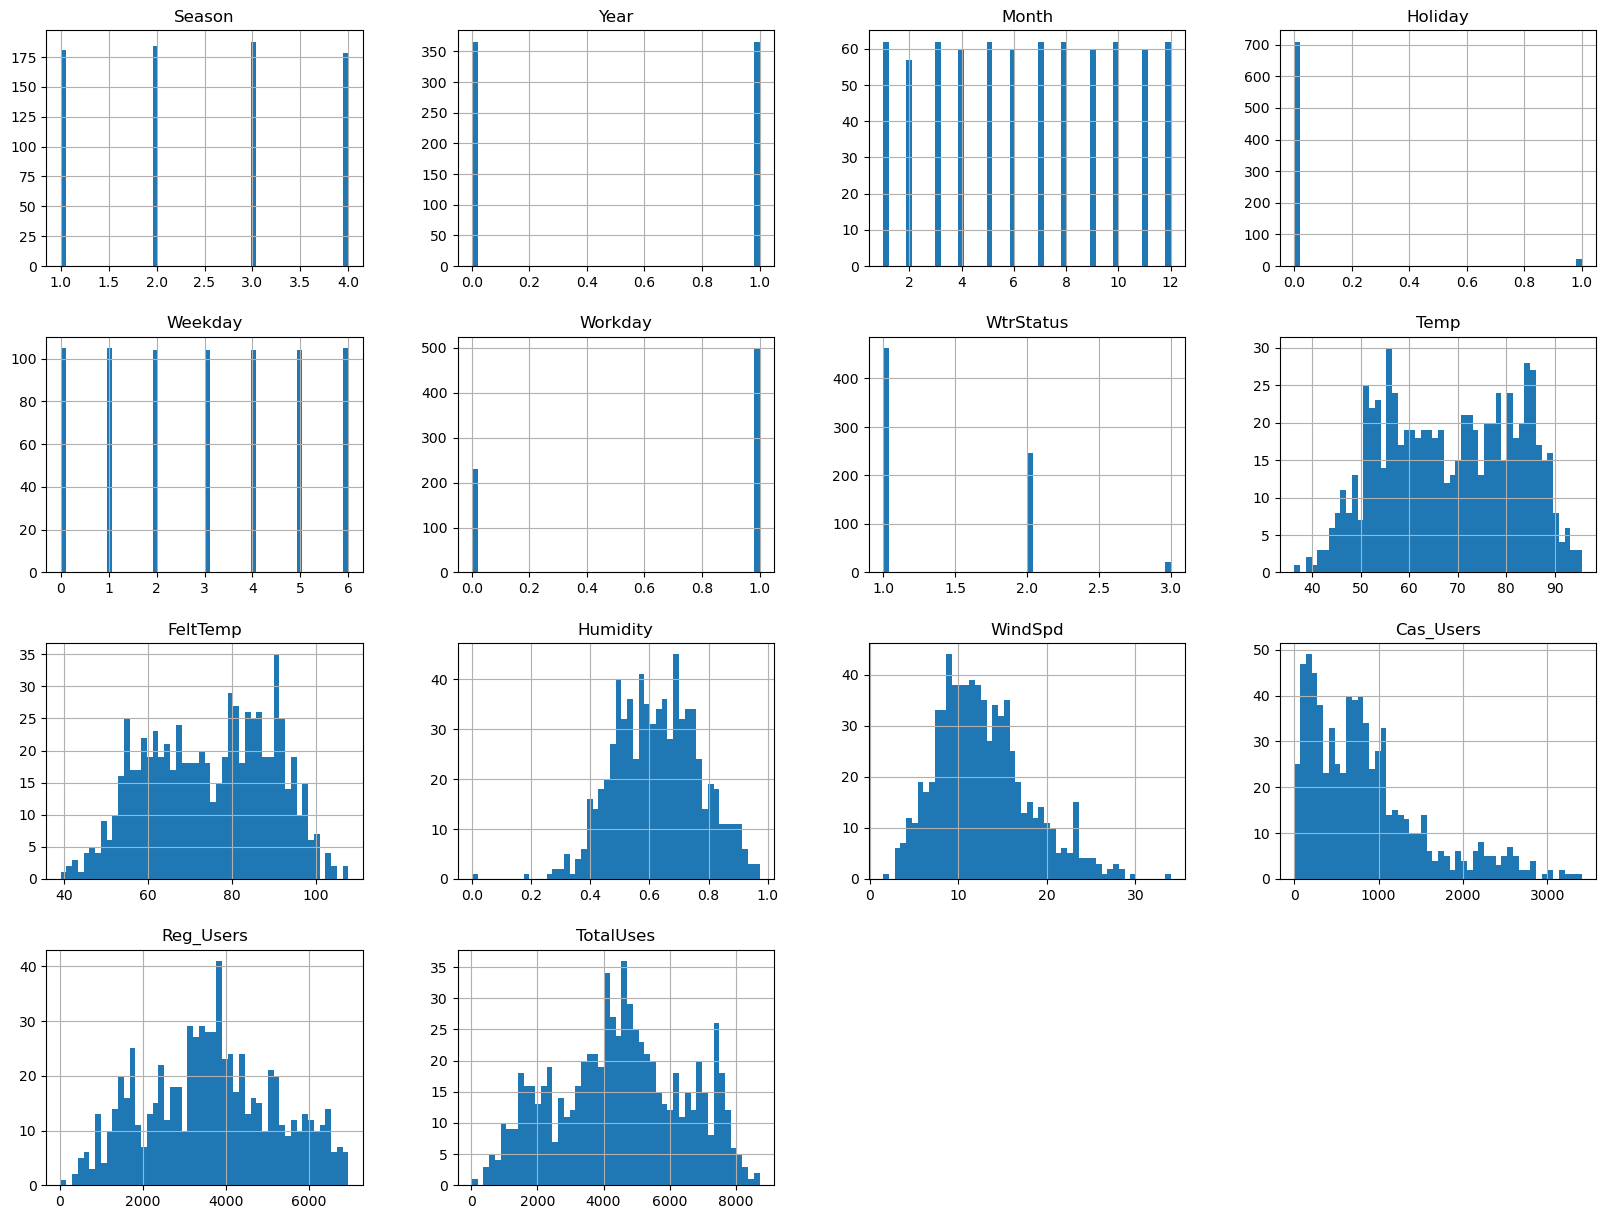

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

oribikedf.hist(bins=50, figsize=(20,15))
plt.show()
               
# Key Histograms include:
# Temp
# FeltTemp
# Humidity - Normal Distribution
# WindSpd - Right Skewed
# Cas_Users - Right Skewed
# Reg_Users - Normal Distribution
# TotalUses - Normal Distribution

(array([ 1.,  0.,  2.,  5.,  6.,  3., 13.,  4., 10., 14., 20., 16., 25.,
        11.,  7., 13., 15., 22., 12., 18., 18., 10., 29., 27., 29., 28.,
        28., 41., 23., 24., 17., 24., 13., 16., 15., 10., 21., 20., 11.,
         9., 12., 10., 13., 12., 10., 11., 14.,  6.,  7.,  6.]),
 array([  20.  ,  158.52,  297.04,  435.56,  574.08,  712.6 ,  851.12,
         989.64, 1128.16, 1266.68, 1405.2 , 1543.72, 1682.24, 1820.76,
        1959.28, 2097.8 , 2236.32, 2374.84, 2513.36, 2651.88, 2790.4 ,
        2928.92, 3067.44, 3205.96, 3344.48, 3483.  , 3621.52, 3760.04,
        3898.56, 4037.08, 4175.6 , 4314.12, 4452.64, 4591.16, 4729.68,
        4868.2 , 5006.72, 5145.24, 5283.76, 5422.28, 5560.8 , 5699.32,
        5837.84, 5976.36, 6114.88, 6253.4 , 6391.92, 6530.44, 6668.96,
        6807.48, 6946.  ]),
 <BarContainer object of 50 artists>)

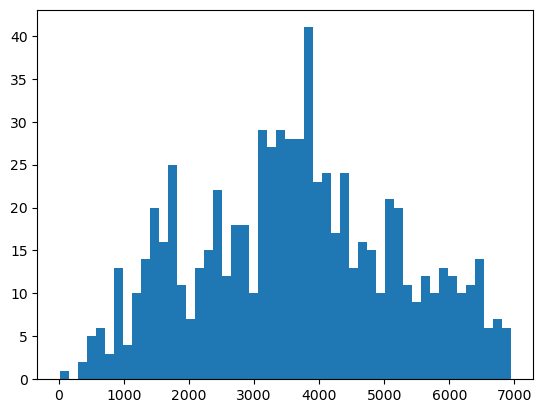

In [12]:
plt.hist(oribikedf['Reg_Users'],bins=50)

In [22]:
bikedf2011 = oribikedf[oribikedf["Year"]==0]
bikedf2012 = oribikedf[oribikedf["Year"]==1]

Text(0.5, 1.0, '2012 Bicycle Use By Months')

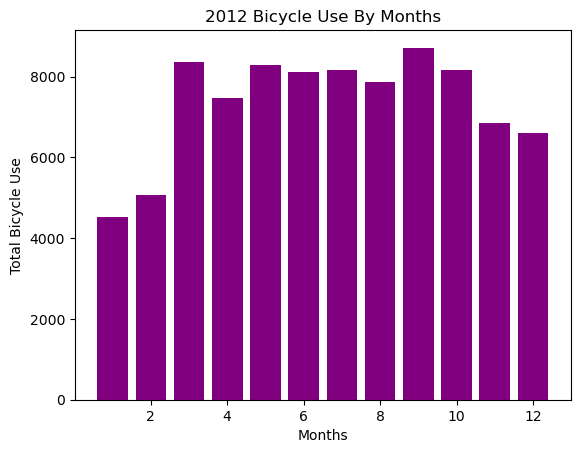

In [16]:
plt.bar(bikedf2012['Month'], bikedf2012['TotalUses'], color = 'Purple')
plt.xlabel("Months")
plt.ylabel('Total Bicycle Use')
plt.title('2012 Bicycle Use By Months')

Text(0.5, 1.0, '2011 Bicycle Use By Months')

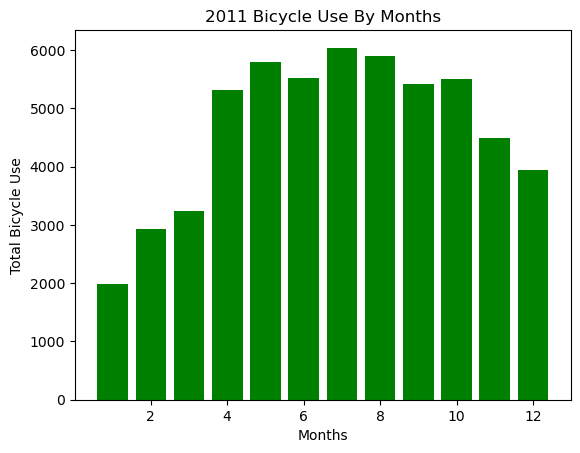

In [17]:
plt.bar(bikedf2011['Month'], bikedf2011['TotalUses'], color = 'green')
plt.xlabel("Months")
plt.ylabel('Total Bicycle Use')
plt.title('2011 Bicycle Use By Months')

In [18]:
# Next few rows will take a look at the increase in use between 2011 and 2012

#Gathers and sums up values within the TotalUses columns in both yearly dataframe variables
totalyearlyuse = bikedf2011['TotalUses'].sum() + bikedf2012['TotalUses'].sum()

In [ ]:
# Makes % out of TotalUses
uses12 = bikedf2012['TotalUses'].sum() / totalyearlyuse
uses12

In [ ]:
# Makes % out of TotalUses
uses11 = bikedf2011['TotalUses'].sum() / totalyearlyuse
uses11

In [ ]:
# Simply calculates the difference between the %s calculated
uses12 - uses11

#ALMOST A 25% INCREASE IN SERVICE USE

Text(0.5, 1.0, 'Yearly Services By Temperature')

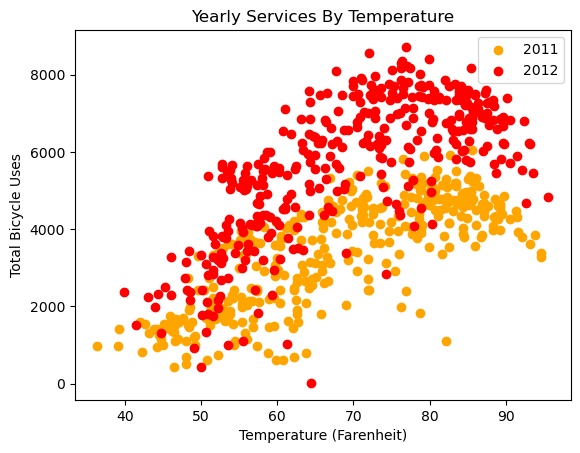

In [21]:
plt.scatter(bikedf2011['Temp'], bikedf2011['TotalUses'], color = 'Orange', label='2011')
plt.scatter(bikedf2012['Temp'], bikedf2012['TotalUses'], color = 'Red', label='2012')
plt.xlabel('Temperature (Farenheit)')
plt.legend()
plt.ylabel('Total Bicycle Uses')
plt.title('Yearly Services By Temperature')

# Scatter Plot Shows a strong positive correlation bewteen Temperature and Total Uses

### Part 5: Missing Data

N/A: None of the rows/columns in our dataset had missing data, so it was not necessary to drop any data.

### Part 6: Feature Creation

In [ ]:
# Creation of the R_UsageRate column to show the proposrtion of registered users

oribikedf['R_UsageRate'] = oribikedf['Reg_Users'] / oribikedf['TotalUses']
oribikedf

### Section 7: Encoding Non-Numeric Features

In [ ]:
# Creation of encoded dummmy variables for Season, since it is not binary
cat_encoder_season = cat_encoder.fit_transform(oribikedf[['Season']].values)
cat_season = pd.DataFrame(cat_encoder_season.toarray(), columns=['Spring', 'Summer', 'Autumn', 'Winter'])
oribikedf = oribikedf.join(cat_season, rsuffix='_season_encoded')
oribikedf = oribikedf.drop('Season', axis=1)

# Creation of encoded dummmy variables for Month, since it is not binary
cat_encoder_month = cat_encoder.fit_transform(oribikedf[['Month']].values)
cat_month = pd.DataFrame(cat_encoder_month.toarray(), columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
oribikedf = oribikedf.join(cat_month, rsuffix='_month_encoded')
oribikedf = oribikedf.drop('Month', axis=1)

# Creation of encoded dummmy variables for WtrStatus, since it is not binary
cat_encoder_wtrstatus = cat_encoder.fit_transform(oribikedf[['WtrStatus']].values)
cat_wtrstatus = pd.DataFrame(cat_encoder_wtrstatus.toarray(), columns=['Clear', 'Cloudy', 'LightRain'])
oribikedf = oribikedf.join(cat_wtrstatus, rsuffix='_wtrstatus_encoded')
oribikedf = oribikedf.drop('WtrStatus', axis=1)

# Creation of encoded dummmy variables for Year, since it is not binary
cat_encoder_year = cat_encoder.fit_transform(oribikedf[['Year']].values)
cat_year = pd.DataFrame(cat_encoder_year.toarray(), columns=['2011', '2012'])
oribikedf = oribikedf.join(cat_year, rsuffix='_year_encoded')
oribikedf = oribikedf.drop('Year', axis=1)

In [ ]:
#Dropping the "Weekday" column, we will focus on the "Workday" column instead since it is already binary
oribikedf = oribikedf.drop('Weekday', axis=1)

#Displaying the final product
pd.options.display.max_columns = None
oribikedf

In [ ]:
# Showing another correlation matrix
oribikedf.corr(numeric_only=True)

In [ ]:
oribikedf.describe()

In [ ]:
# There are currently too many features, so I will drop everything except the Temp, Hum, WindSpd, Usage rate and Month coluns
# 
oribikedf
columns_to_drop = ['Date', 'Holiday', 'Workday', 'FeltTemp', 'Cas_Users', 'Reg_Users', 'Spring', 'Summer', 'Autumn', 'Winter', 'Clear', 'Cloudy', 'LightRain', '2011', '2012']
oribikedf = oribikedf.drop(columns=columns_to_drop)
oribikedf

### Section 8: Train and Test Set Creation

In [ ]:
# Creates the training dataset and the testing dataset. Shows the training set

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(oribikedf, test_size=0.3, random_state=42)
train_set

In [ ]:
# Shows the testing set
test_set

In [ ]:
# Preparing the Data for the Linear Regression Algorithm by creating the X and Y datasets so that X can be used to predict
oribikedf_train_X = train_set.drop("TotalUses", axis=1) 
oribikedf_train_y = train_set["TotalUses"].copy()

# Conduction the same procedure for the test set
oribikedf_test_X = test_set.drop("TotalUses", axis=1) 
oribikedf_test_y = test_set["TotalUses"].copy()

### Section 9: Training the Model

In [ ]:
# Importing the model, giving it a name, and giving it the training datasets
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(oribikedf_train_X, oribikedf_train_y)

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.4f}'.format
pd.DataFrame(lin_reg.coef_, index = oribikedf_train_X.columns)

### Section 10: Model Evalutation

In [ ]:
# Using In-sample/Train Set evaluation to see how much error the model has  (Mean Squared Error)
from sklearn.metrics import mean_squared_error
oribikedf_predictions_train = lin_reg.predict(oribikedf_train_X)
actual_TotalUses = pd.DataFrame(oribikedf_train_y).reset_index(drop=True)
pd.DataFrame(oribikedf_predictions_train).round().join(actual_TotalUses).rename(columns={0:'Predicted'})

In [ ]:
# This error does not seem to be very good
lin_mse = mean_squared_error(oribikedf_train_y, oribikedf_predictions_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
# Using Out-of-sample/Test Set evaluation to see how much error the model has (Mean Squared Error)
oribikedf_predictions_test = lin_reg.predict(oribikedf_test_X)
actual_TotalUses = pd.DataFrame(oribikedf_test_y).reset_index(drop=True)
pd.DataFrame(oribikedf_predictions_test).round().join(actual_TotalUses).rename(columns={0:'Predicted'})

In [ ]:
# This error does not seem to be very good either
lin_mse = mean_squared_error(oribikedf_test_y, oribikedf_predictions_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse